In [13]:
import CAD_to_OpenMC.assembly as ab

In [1]:
import CAD_to_OpenMC.assembly as ab
a=ab.Assembly()
a.stp_files=["7pin.step"]
a.import_stp_files()
a.solids_to_h5m()

INFO: 7pin.step imported - scaling
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.615686, 0.811765, 0.929412) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.647059, 0.647059, 0.647059) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.231373, 0.380392, 0.705882) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.917647, 0.917647, 0.917647) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.768627, 0.886275, 0.952941) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.972549, 0.529412, 0.00392157) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.498039, 0.498039, 0.498039) (3D & Surfaces)
Info    :  - Label 'Shapes/graphite' (3D)
Info    :  - Color (0.980392, 0.713725, 0.00392157) (3D & Surfaces)
Info    :  - Label 'Shapes/graphite' (3D)
Info    :  - Color (0.615686, 0.811765, 0.929412) (3D & Surfaces)
Info    :  - Labe

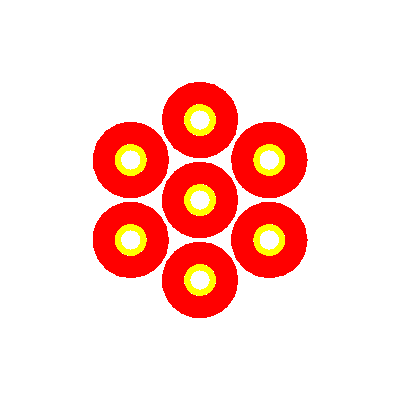

In [4]:
import openmc


from IPython.display import Image
from matplotlib import pyplot as plt
 # materials
u235 = openmc.Material(name="fuel")
u235.add_nuclide('U235', 1.0, 'ao')
u235.set_density('g/cc', 11)

water = openmc.Material(name="water")
water.add_nuclide('H1', 2.0, 'ao')
water.add_nuclide('O16', 1.0, 'ao')
water.set_density('g/cc', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')

graphite = openmc.Material(name="graphite")
graphite.add_nuclide('C12',1.0,'ao')
graphite.set_density('g/cc',2.26)



materials = openmc.Materials([u235, water, graphite])

dagmc_univ = openmc.DAGMCUniverse(filename='dagmc.h5m', auto_geom_ids=True, auto_mat_ids=True)
bounding_box = openmc.rectangular_prism(20,20,boundary_type='reflective')

cell = openmc.Cell(region=bounding_box, fill=dagmc_univ)
geometry = openmc.Geometry([cell])

settings = openmc.Settings()
settings.batches = 100
settings.inactive = 2
settings.particles = 10000

model = openmc.Model(geometry=geometry, materials=materials, settings=settings)
model.export_to_model_xml()

p = openmc.Plot()
p.width = (25.0, 25.0)
p.pixels = (400, 400)
p.color_by = 'material'
p.colors = {u235: 'yellow', water: 'blue', graphite:'red'}
openmc.plot_inline(p)

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################